# day06_04_pandas2
- pandas로 데이터 다루기

In [2]:
import pandas as pd
import numpy as np

In [9]:
# 랜덤값을 가지고 dataframe 만들기
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.495022,-0.128716,-0.085100,-0.807992
1,1.151604,-0.223081,-0.540314,-1.098925
2,1.711156,-1.183122,1.613027,-0.328374
3,-1.906830,1.256500,-0.515500,-0.674083
4,-0.290541,1.106455,-1.512234,-0.307648
5,1.535777,0.127900,0.978746,0.639228
6,0.830412,-1.061393,-1.867455,-0.815381
7,-0.254742,0.569441,-0.533707,1.233183
8,0.695559,0.287439,0.117529,0.301038
9,1.116937,0.077824,-0.070440,0.577116


In [14]:
# 데이터 저장하기
# ../resource/파일명
df.to_csv('../../resource/my_csv.csv')

In [16]:
# 데이터 불러오기(로드)
# pd.read_csv(경로)
pd.read_csv('../../resource/my_csv.csv', index_col=0)

,0,1,2,3
0,0.495022,-0.128716,-0.085100,-0.807992
1,1.151604,-0.223081,-0.540314,-1.098925
2,1.711156,-1.183122,1.613027,-0.328374
3,-1.906830,1.256500,-0.515500,-0.674083
4,-0.290541,1.106455,-1.512234,-0.307648
5,1.535777,0.127900,0.978746,0.639228
6,0.830412,-1.061393,-1.867455,-0.815381
7,-0.254742,0.569441,-0.533707,1.233183
8,0.695559,0.287439,0.117529,0.301038
9,1.116937,0.077824,-0.070440,0.577116


In [19]:
# 실습하기
url = 'https://raw.githubusercontent.com/luxdolorosa/data_set/master/pandas/my_data_01.csv'
df3 = pd.read_csv(url, index_col=0)

In [27]:
# 나누어진 데이터를 붙이기
# pd.concat()
pd.concat([df3[:3],df3[3:7],df3[7:]])

,0,1,2,3
0,0.359715,0.602395,0.492750,1.106551
1,0.430092,0.169384,-0.519361,1.082588
2,1.296953,-1.321306,0.825732,0.029630
3,1.346803,0.882604,-0.794989,-1.161725
4,2.358513,2.022011,1.217077,-1.298440
5,-0.552208,-0.033654,0.140369,-0.658523
6,0.399510,0.263826,-0.613950,-1.067611
7,1.095347,-1.212130,-2.235162,-0.321935
8,-0.926836,1.098149,1.108052,-0.883667
9,-1.195817,-1.118847,-0.251534,0.336585


# Join 데이터 합치기

In [28]:
left = pd.DataFrame({'key':['foo','foo'],'lval':[1,2]})
left

,key,lval
0,foo,1
1,foo,2


In [29]:
right = pd.DataFrame({'key':['foo','foo'],'rval':[4,5]})
right

,key,rval
0,foo,4
1,foo,5


In [33]:
# foo라는 키를 기준으로 데이터를 합쳐서 조회하기
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [32]:
left = pd.DataFrame({'key':['foo','bar'],'lval':[1,2]})
right = pd.DataFrame({'key':['foo','bar'],'rval':[4,5]})

In [34]:
left

,key,lval
0,foo,1
1,bar,2


In [35]:
right

,key,rval
0,foo,4
1,bar,5


In [36]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping 예제
- group이란 특정한 조건으로 데이터를 묶는 것

In [39]:
url = 'https://raw.githubusercontent.com/luxdolorosa/data_set/master/pandas/my_data_02.csv'
df4 = pd.read_csv(url)
df4

,A,B,C,D
0,foo,one,-0.272853,0.445702
1,bar,one,-0.942053,-1.546124
2,foo,two,1.163523,1.230163
3,bar,three,-0.428761,0.325022
4,foo,two,1.188806,2.189103
5,bar,two,-1.320671,-1.510452
6,foo,one,-1.729539,1.112231
7,foo,three,1.403014,0.256193


In [42]:
# A열을 그룹화하여 총합구하기
# - 수치성(연산이 가능한) 데이터가 아닌 경우 자동으로 제외된다.
df4.groupby('A').sum()

,C,D
A,,
bar,-2.691485,-2.731554
foo,1.752951,5.233392


In [43]:
# B열을 그룹화하여 총합 구하기
df4.groupby('B').sum()

,C,D
B,,
one,-2.944445,0.011809
three,0.974253,0.581215
two,1.031658,1.908814


In [46]:
# 실습하기
# A열의 B열을 소그룹화하여 값의 총합구하기
df4.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.942053 -1.546124
    three -0.428761  0.325022
    two   -1.320671 -1.510452
foo one   -2.002392  1.557933
    three  1.403014  0.256193
    two    2.352329  3.419265

In [48]:
# 시계열
# - 시계열이란 시간의 흐름에 따른 데이터의 흐름을 파악할 수 있는 데이터

In [47]:
# 시각화를 노트북에서 바로 보겠다.
# - 선언하지 않고 작동시키면 1번 실행할 때 클립보드(메모리)에 적재되고,
# - 2번째 실행했을 때 노트북에서 보인다.
%matplotlib inline

In [52]:
periods = pd.date_range('1/1/2020', periods=1000)

In [54]:
ts = pd.Series(np.random.randn(1000), index=periods)

In [59]:
# cumsum() : 누산합계
# - 각 성분에 대해서 앞의 성분을 더해가면서 연산이 되는 합계
# -ex) 1, 2, 3, 4, 5의 데이터가 있다면
#       누산합계는
#       1, 1+2, 1+2+3, 1+2+3+4, 1+2+3+4+5의 형태로 합계를 구하는 연산
ts = ts.cumsum()

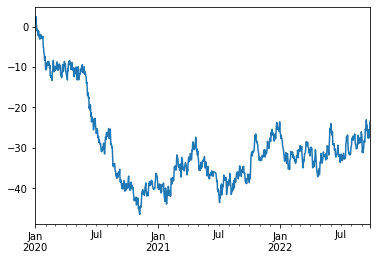

In [60]:
ts.plot()
pass

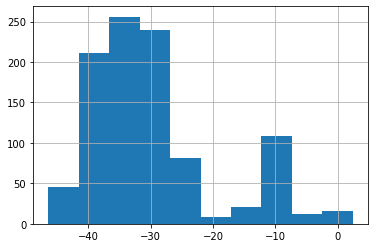

In [62]:
ts.hist()
pass